In [1]:
import tensorflow as tf
tf_version = tf.__version__

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU
from keras import activations
from keras import utils
from sklearn.metrics import confusion_matrix

%matplotlib inline

### Load data, preprocess

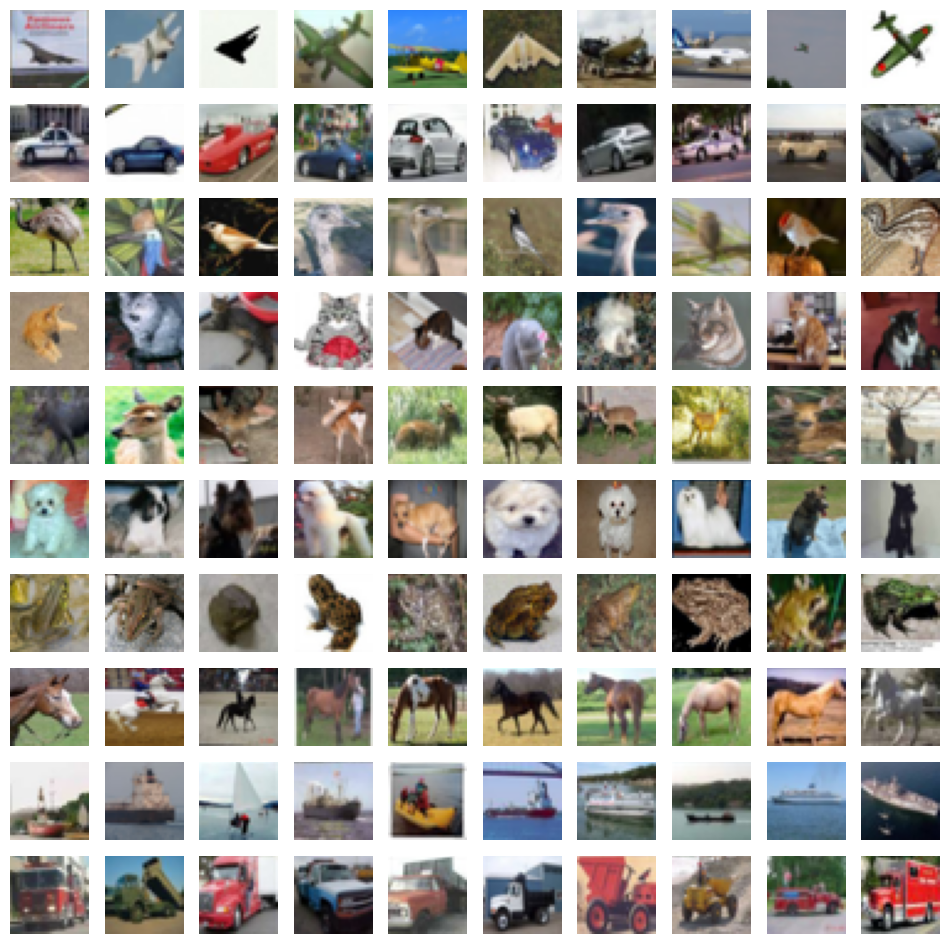

training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)


In [4]:
def show_imgs(X,y):
    plt.figure(1, figsize=(12,12))
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            while y[k] != i: k += 1
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k])
            plt.axis('off')
            k += 1
    plt.show()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_test, y_test)
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [6]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)

### Define the model

In [7]:
def get_base_model() -> Sequential:
    cnn = Sequential()
    cnn.add(keras.Input(X_train.shape[1:]))
    cnn.add(Conv2D(32, (3,3), padding='same'))
    cnn.add(MaxPooling2D((2,2)))
    cnn.add(Conv2D(32, (3,3), padding='same'))
    cnn.add(ReLU())
    cnn.add(MaxPooling2D((2,2)))
    cnn.add(Conv2D(64, (3,3), padding='same'))
    cnn.add(ReLU())
    cnn.add(Conv2D(64, (3,3), padding='same'))
    cnn.add(ReLU())
    cnn.add(MaxPooling2D((2,2)))
    cnn.add(Flatten())
    cnn.add(Dense(50, activation='relu'))
    cnn.add(Dense(50, activation='relu'))
    cnn.add(Dense(10, activation='softmax'))
    return cnn

In [8]:
epochs = 12
base = get_base_model()
base.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
base_log = base.fit(X_train, Y_train, batch_size=128, epochs=epochs, validation_split=0.2)

Epoch 1/12


c:\Users\Milena\Documents\Studium\Mastah\DL\DeLearn\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3102 - loss: 1.8831 - val_accuracy: 0.4837 - val_loss: 1.4114
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5141 - loss: 1.3513 - val_accuracy: 0.5549 - val_loss: 1.2445
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5930 - loss: 1.1529 - val_accuracy: 0.6247 - val_loss: 1.0738
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6413 - loss: 1.0196 - val_accuracy: 0.6444 - val_loss: 1.0210
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6785 - loss: 0.9117 - val_accuracy: 0.6584 - val_loss: 0.9898
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7027 - loss: 0.8470 - val_accuracy: 0.6768 - val_loss: 0.9228
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7225 - loss: 0.7807 - val_accuracy: 0.6980 - val_loss: 0.8804
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7462 - loss: 0.7254 - val_accuracy: 0.708

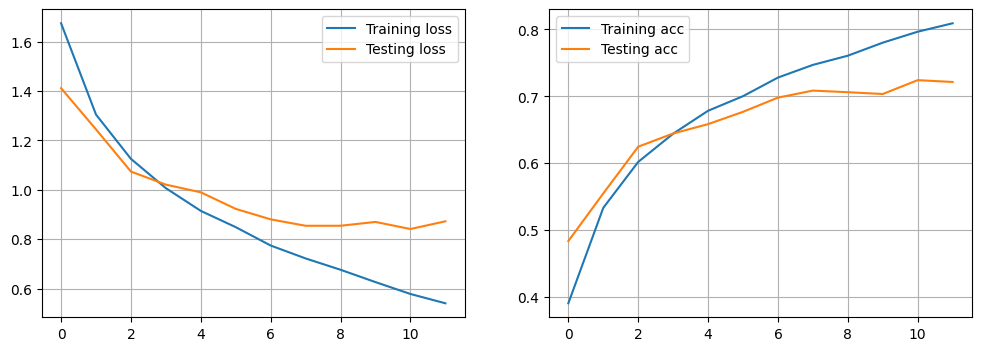

In [9]:
def plot_log(log):
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(log.history['loss'], label='Training loss')
    ax1.plot(log.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(log.history['accuracy'], label='Training acc')
    ax2.plot(log.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()

plot_log(base_log)

### Change ReLU activation to tanh activation

In [14]:
def get_model(
    activation: activations = activations.relu,
    batchnorm: bool = False,
    dropout: bool = False,
) -> Sequential:
    cnn = Sequential()
    cnn.add(keras.Input(X_train.shape[1:]))
    for _ in range(2):
        cnn.add(Conv2D(32, (3, 3), padding="same"))
        if batchnorm:
            cnn.add(BatchNormalization())
        cnn.add(Activation(activation))
        cnn.add(MaxPooling2D((2, 2)))
    for _ in range(2):
        cnn.add(Conv2D(64, (3, 3), padding="same"))
        if batchnorm:
            cnn.add(BatchNormalization())
        cnn.add(Activation(activation))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Flatten())
    for _ in range(2):
        if dropout:
            cnn.add(Dropout(0.3))
        cnn.add(Dense(50))
        if batchnorm:
            cnn.add(BatchNormalization())
        cnn.add(Activation(activation))
    if dropout:
            cnn.add(Dropout(0.3))
    cnn.add(Dense(10))
    if batchnorm:
            cnn.add(BatchNormalization())
    cnn.add(Activation(activations.softmax))
    return cnn

In [15]:
tanh = get_model(activation=activations.tanh)
tanh.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        51,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,878 (468.27 KB)

 Trainable params: 119,878 (468.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3609 - loss: 1.7558 - val_accuracy: 0.5588 - val_loss: 1.2639
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5800 - loss: 1.1816 - val_accuracy: 0.6175 - val_loss: 1.0678
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6466 - loss: 0.9998 - val_accuracy: 0.6453 - val_loss: 1.0162
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6944 - loss: 0.8841 - val_accuracy: 0.6730 - val_loss: 0.9589
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7210 - loss: 0.8137 - val_accuracy: 0.6609 - val_loss: 0.9773
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7456 - loss: 0.7362 - val_accuracy: 0.6901 - val_loss: 0.9067
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7688 - loss: 0.6699 - val_accuracy: 0.7038 - val_loss: 0.8798
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7863 - loss: 0.6178 - val_accu

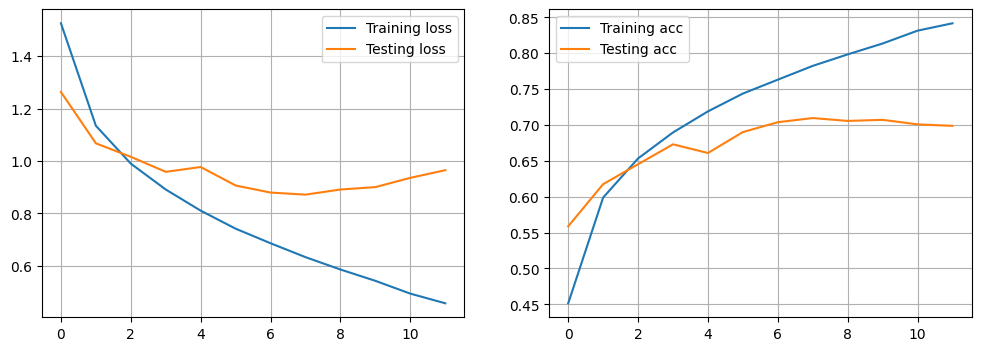

In [16]:
tanh.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
tanh_log = tanh.fit(X_train, Y_train, batch_size=128, epochs=epochs, validation_split=0.2)
plot_log(tanh_log)

### Include Batch Normalization

In [17]:
relu_norm = get_model(activation=activations.relu, batchnorm=True)
relu_norm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │        51,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 50)             │             

 Total params: 121,086 (472.99 KB)

 Trainable params: 120,482 (470.63 KB)

 Non-trainable params: 604 (2.36 KB)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.4188 - loss: 1.6792 - val_accuracy: 0.2176 - val_loss: 2.3133
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6473 - loss: 1.0834 - val_accuracy: 0.5282 - val_loss: 1.3985
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7189 - loss: 0.8736 - val_accuracy: 0.6075 - val_loss: 1.1711
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7564 - loss: 0.7487 - val_accuracy: 0.6577 - val_loss: 1.0380
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7908 - loss: 0.6485 - val_accuracy: 0.6674 - val_loss: 0.9760
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8218 - loss: 0.5607 - val_accuracy: 0.6748 - val_loss: 1.0034
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8421 - loss: 0.4927 - val_accuracy: 0.6994 - val_loss: 0.9072
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8621 - loss: 0.4310 - val_acc

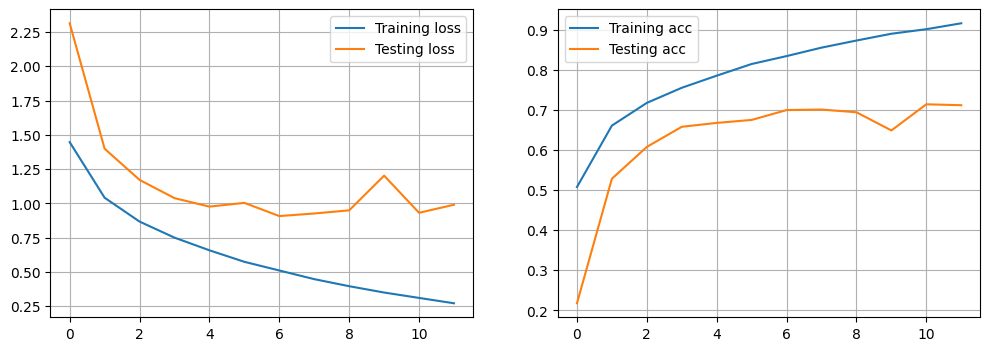

In [18]:
relu_norm.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
relu_norm_log = relu_norm.fit(X_train, Y_train, batch_size=128, epochs=epochs, validation_split=0.2)
plot_log(relu_norm_log)

Epoch 1/12


c:\Users\Milena\Documents\Studium\Mastah\DL\DeLearn\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.4118 - loss: 1.6987 - val_accuracy: 0.2788 - val_loss: 2.0958
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6156 - loss: 1.1685 - val_accuracy: 0.5063 - val_loss: 1.4324
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6737 - loss: 0.9945 - val_accuracy: 0.5438 - val_loss: 1.3181
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7183 - loss: 0.8601 - val_accuracy: 0.6585 - val_loss: 0.9964
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7474 - loss: 0.7712 - val_accuracy: 0.5837 - val_loss: 1.2231
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7677 - loss: 0.7036 - val_accuracy: 0.6583 - val_loss: 1.0113
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7958 - loss: 0.6284 - val_accuracy: 0.6407 - val_loss: 1.1007
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8104 - loss: 0.5795 - val_accuracy: 0.65

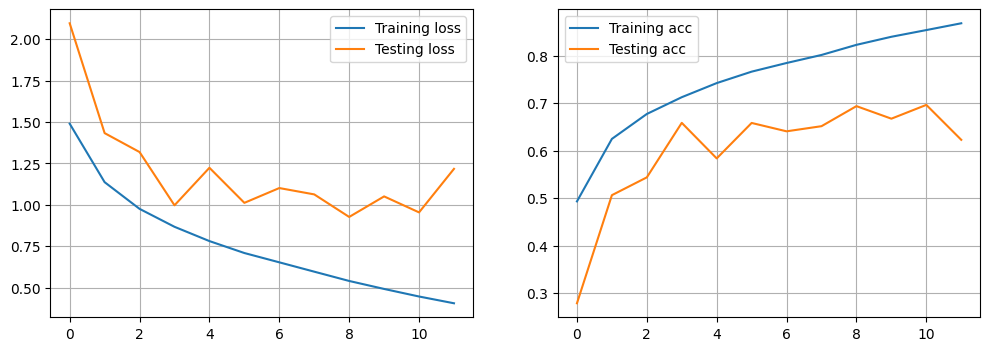

In [19]:
tanh_norm = get_model(activation=activations.tanh, batchnorm=True)
tanh_norm.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
tanh_norm_log = tanh_norm.fit(X_train, Y_train, batch_size=128, epochs=epochs, validation_split=0.2)
plot_log(tanh_norm_log)

### Add dropout

In [33]:
relu_do = get_model(activation=activations.relu, dropout=True)
relu_do.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │        51,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_53 (Activation)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_54 (Activation)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_55 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,878 (468.27 KB)

 Trainable params: 119,878 (468.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2088 - loss: 2.1050 - val_accuracy: 0.4374 - val_loss: 1.5457
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3955 - loss: 1.6242 - val_accuracy: 0.5163 - val_loss: 1.3586
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4678 - loss: 1.4481 - val_accuracy: 0.5619 - val_loss: 1.2338
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5219 - loss: 1.3339 - val_accuracy: 0.5848 - val_loss: 1.1501
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5634 - loss: 1.2219 - val_accuracy: 0.6131 - val_loss: 1.0925
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5961 - loss: 1.1515 - val_accuracy: 0.6489 - val_loss: 0.9981
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6237 - loss: 1.0924 - val_accuracy: 0.6660 - val_loss: 0.9682
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6416 - loss: 1.0310 - val_accu

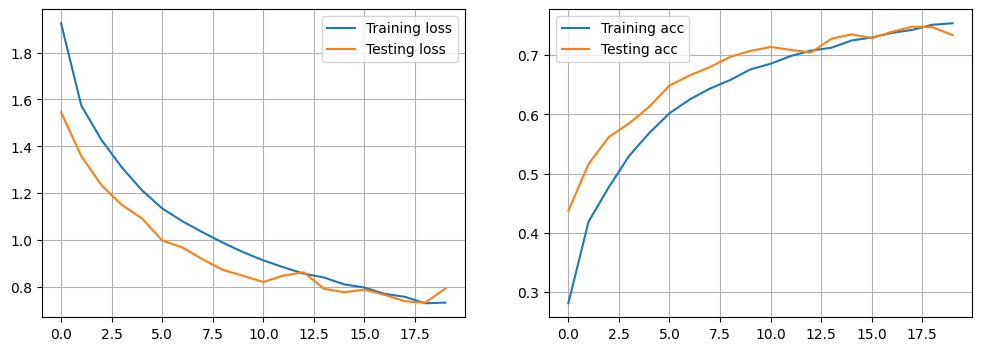

In [34]:
do_epochs = 20
relu_do.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
relu_do_log = relu_do.fit(X_train, Y_train, batch_size=128, epochs=do_epochs, validation_split=0.2)
plot_log(relu_do_log)

Epoch 1/20


c:\Users\Milena\Documents\Studium\Mastah\DL\DeLearn\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.2812 - loss: 2.0075 - val_accuracy: 0.1712 - val_loss: 2.2962
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4923 - loss: 1.4683 - val_accuracy: 0.4762 - val_loss: 1.4975
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5772 - loss: 1.2622 - val_accuracy: 0.5695 - val_loss: 1.2323
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6221 - loss: 1.1308 - val_accuracy: 0.5375 - val_loss: 1.3230
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6595 - loss: 1.0357 - val_accuracy: 0.5887 - val_loss: 1.1882
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6846 - loss: 0.9628 - val_accuracy: 0.6925 - val_loss: 0.9064
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7001 - loss: 0.9098 - val_accuracy: 0.6970 - val_loss: 0.8728
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7179 - loss: 0.8581 - val_accuracy: 0.72

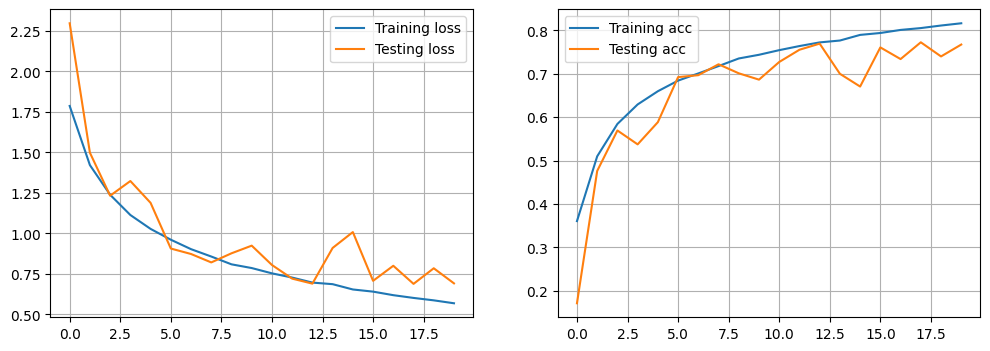

In [23]:
relu_norm_do = get_model(activation=activations.relu, batchnorm=True, dropout=True)
relu_norm_do.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
relu_norm_do_log = relu_norm_do.fit(X_train, Y_train, batch_size=128, epochs=do_epochs, validation_split=0.2)
plot_log(relu_norm_do_log)

Epoch 1/20


c:\Users\Milena\Documents\Studium\Mastah\DL\DeLearn\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2987 - loss: 1.8856 - val_accuracy: 0.5268 - val_loss: 1.3470
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4970 - loss: 1.4021 - val_accuracy: 0.5963 - val_loss: 1.1398
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5625 - loss: 1.2369 - val_accuracy: 0.6299 - val_loss: 1.0521
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5942 - loss: 1.1568 - val_accuracy: 0.6515 - val_loss: 1.0084
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6248 - loss: 1.0781 - val_accuracy: 0.6623 - val_loss: 0.9794
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6389 - loss: 1.0503 - val_accuracy: 0.6832 - val_loss: 0.9267
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6543 - loss: 0.9971 - val_accuracy: 0.6897 - val_loss: 0.8979
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6642 - loss: 0.9773 - val_accuracy: 0.696

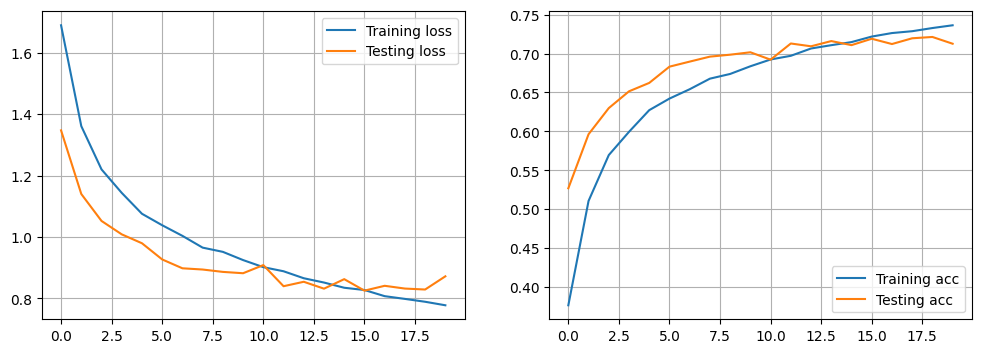

In [24]:
tanh_do = get_model(activation=activations.tanh, dropout=True)
tanh_do.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
tanh_do_log = tanh_do.fit(X_train, Y_train, batch_size=128, epochs=do_epochs, validation_split=0.2)
plot_log(tanh_do_log)

Epoch 1/20


c:\Users\Milena\Documents\Studium\Mastah\DL\DeLearn\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.3068 - loss: 1.9384 - val_accuracy: 0.1929 - val_loss: 2.4161
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4868 - loss: 1.4927 - val_accuracy: 0.5209 - val_loss: 1.3892
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5549 - loss: 1.3141 - val_accuracy: 0.5159 - val_loss: 1.3447
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6002 - loss: 1.1848 - val_accuracy: 0.4922 - val_loss: 1.4413
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6391 - loss: 1.0832 - val_accuracy: 0.5873 - val_loss: 1.2166
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6527 - loss: 1.0319 - val_accuracy: 0.6643 - val_loss: 0.9660
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6656 - loss: 0.9856 - val_accuracy: 0.6170 - val_loss: 1.0982
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6832 - loss: 0.9462 - val_accuracy: 0.68

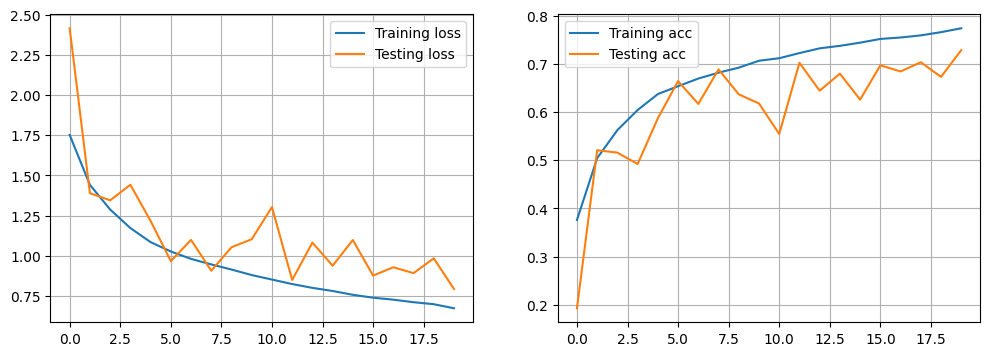

In [25]:
tanh_norm_do = get_model(activation=activations.tanh, batchnorm = True, dropout=True)
tanh_norm_do.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
tanh_norm_do_log = tanh_norm_do.fit(X_train, Y_train, batch_size=128, epochs=do_epochs, validation_split=0.2)
plot_log(tanh_norm_do_log)

### Summarize results

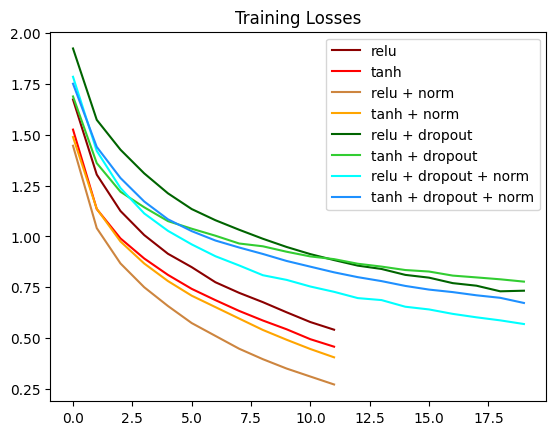

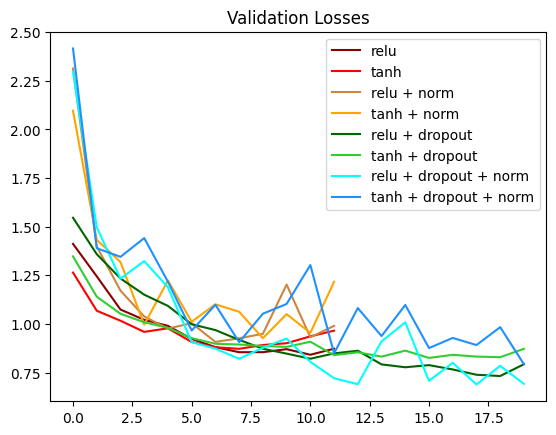

In [35]:
logs = (base_log, tanh_log, relu_norm_log, tanh_norm_log, relu_do_log, tanh_do_log, relu_norm_do_log, tanh_norm_do_log)
desc = ('relu','tanh', 'relu + norm', 'tanh + norm', 'relu + dropout', 'tanh + dropout', 'relu + dropout + norm', 'tanh + dropout + norm')
colors = ('darkred', 'red', 'peru', 'orange', 'darkgreen','limegreen', 'cyan', 'dodgerblue')
plt.figure(1)
for i in range(len(logs)):
    plt.title("Training Losses")
    plt.plot(logs[i].history['loss'], color=colors[i], label=desc[i])
    plt.legend()
plt.figure(2)
for j in range(len(logs)):
    plt.title("Validation Losses")
    plt.plot(logs[j].history['val_loss'], color=colors[j], label=desc[j])
    plt.legend()
